In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns

# Dataset import

In [398]:

base_path = r'C:\Users\RACYM\Desktop\fac\M2_PFE\datasets\CIC-DDoS2019\\'

cic_ddos2019 = {
    'DNS-test': pd.read_parquet(base_path + 'DNS-testing.parquet', engine='fastparquet'),

    'LDAP-test': pd.read_parquet(base_path + 'LDAP-testing.parquet', engine='fastparquet'),
    'LDAP-train': pd.read_parquet(base_path + 'LDAP-training.parquet', engine='fastparquet'),
    
    'MSSQL-test': pd.read_parquet(base_path + 'MSSQL-testing.parquet', engine='fastparquet'),
    'MSSQL-train': pd.read_parquet(base_path + 'MSSQL-training.parquet', engine='fastparquet'),
    
    'NetBIOS-test': pd.read_parquet(base_path + 'NetBIOS-testing.parquet', engine='fastparquet'),
    'NetBIOS-train': pd.read_parquet(base_path + 'NetBIOS-training.parquet', engine='fastparquet'),
    
    'NTP-test': pd.read_parquet(base_path + 'NTP-testing.parquet', engine='fastparquet'),
    
    'Portmap-train': pd.read_parquet(base_path + 'Portmap-training.parquet', engine='fastparquet'),
    'SNMP-test': pd.read_parquet(base_path + 'SNMP-testing.parquet', engine='fastparquet'),
    
    'Syn-test': pd.read_parquet(base_path + 'Syn-testing.parquet', engine='fastparquet'),
    'Syn-train': pd.read_parquet(base_path + 'Syn-training.parquet', engine='fastparquet'),
    
    'TFTP-test': pd.read_parquet(base_path + 'TFTP-testing.parquet', engine='fastparquet'),
    
    'UDPLag-test': pd.read_parquet(base_path + 'UDPLag-testing.parquet', engine='fastparquet'),
    'UDPLag-train': pd.read_parquet(base_path + 'UDPLag-training.parquet', engine='fastparquet'),
    
    'UDP-test': pd.read_parquet(base_path + 'UDP-testing.parquet', engine='fastparquet'),
    'UDP-train': pd.read_parquet(base_path + 'UDP-training.parquet', engine='fastparquet'),
}

# merging between train sets and test sets for each attack type
cic_ddos2019_merged = {
    'DNS': cic_ddos2019['DNS-test'],
    'LDAP': pd.concat([cic_ddos2019['LDAP-train'], cic_ddos2019['LDAP-test']], ignore_index=True),
    'MSSQL': pd.concat([cic_ddos2019['MSSQL-train'], cic_ddos2019['MSSQL-test']], ignore_index=True),
    'NetBIOS': pd.concat([cic_ddos2019['NetBIOS-train'], cic_ddos2019['NetBIOS-test']], ignore_index=True),    
    'NTP': cic_ddos2019['NTP-test'],
    'Portmap': cic_ddos2019['Portmap-train'],
    'SNMP': cic_ddos2019['SNMP-test'],
    'Syn': pd.concat([cic_ddos2019['Syn-train'], cic_ddos2019['Syn-test']], ignore_index=True),
    'TFTP': cic_ddos2019['TFTP-test'],
    'UDPLag': pd.concat([cic_ddos2019['UDPLag-train'], cic_ddos2019['UDPLag-test']], ignore_index=True),
    'UDP': pd.concat([cic_ddos2019['UDP-train'], cic_ddos2019['UDP-test']], ignore_index=True),
}

# merging all attack types 
cic_ddos2019_all = pd.concat(cic_ddos2019_merged.values(), ignore_index=True)

- cic_ddos2019 : (dictionary) contaning the raw imported parts of the dataset
- cic_ddos2019_merged : (dictionary) simplified version where the dataset parts are merged between train and test for each attack type
- cic_ddos2019_all : (dataframe) the whole dataset merged between test/train and all the attack types

# Dataset Visualisation

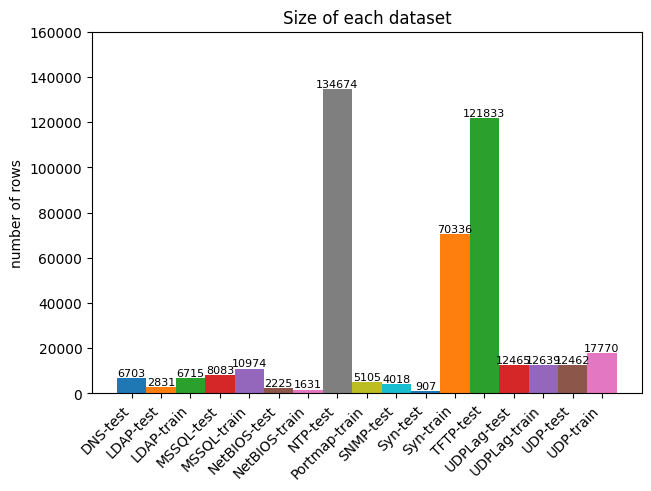

In [399]:
# checking the size of every dataset part

fig, ax = plt.subplots(layout='constrained')
positions = []
dataset_names = []
mult = 0
barWidth = 1

for dataset_name, dataset in cic_ddos2019.items():
    position = barWidth * mult
    dataset_names.append(dataset_name)
    positions.append(position)
    currentBar = ax.bar(position, dataset.shape[0], width=barWidth, label=dataset_name)
    ax.bar_label(currentBar, fontsize=8)
    mult += 1

ax.set_xticks(positions, dataset_names)
ax.set_xticklabels(dataset_names, rotation=45, ha='right')
ax.set_ybound(0,160000)
ax.set_title('Size of each dataset')
ax.set_ylabel('number of rows')

plt.show()

[0, 6715, 10974, 1631, 0, 5105, 0, 70336, 0, 12639, 17770]
[6703, 2831, 8083, 2225, 134674, 0, 4018, 907, 121833, 12465, 12462]


C:\Users\RACYM\AppData\Local\Temp\ipykernel_8112\4143570142.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(dataset_names, rotation=45, ha='right')


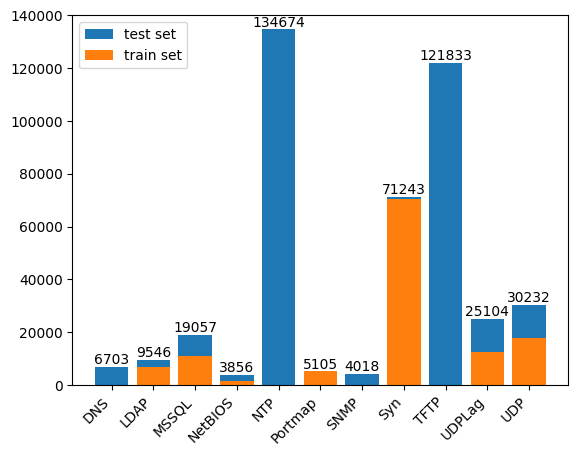

In [400]:
# stacked bars for each dataset train/test data and total

dataset_names = ['DNS', 'LDAP', 'MSSQL', 'NetBIOS', 'NTP','Portmap', 'SNMP', 'Syn', 'TFTP', 'UDPLag', 'UDP']

lenghts_train = [
    0,
    cic_ddos2019['LDAP-train'].shape[0],
    cic_ddos2019['MSSQL-train'].shape[0],
    cic_ddos2019['NetBIOS-train'].shape[0],
    0,
    cic_ddos2019['Portmap-train'].shape[0],
    0,
    cic_ddos2019['Syn-train'].shape[0],
    0,
    cic_ddos2019['UDPLag-train'].shape[0],
    cic_ddos2019['UDP-train'].shape[0]
]
lenghts_test = [
    cic_ddos2019['DNS-test'].shape[0],
    cic_ddos2019['LDAP-test'].shape[0],
    cic_ddos2019['MSSQL-test'].shape[0],
    cic_ddos2019['NetBIOS-test'].shape[0],
    cic_ddos2019['NTP-test'].shape[0],
    0,
    cic_ddos2019['SNMP-test'].shape[0],
    cic_ddos2019['Syn-test'].shape[0],
    cic_ddos2019['TFTP-test'].shape[0],
    cic_ddos2019['UDPLag-test'].shape[0],
    cic_ddos2019['UDP-test'].shape[0]
]
print(lenghts_train)
print(lenghts_test)
lenghts_total = [lenghts_test[i] + lenghts_train[i] for i in range(len(lenghts_test))]


fig, ax = plt.subplots()
topRect = ax.bar(dataset_names, lenghts_test, bottom=lenghts_train, label='test set')
ax.bar(dataset_names, lenghts_train, label='train set')

ax.set_ybound(0,140000)
ax.bar_label(topRect, lenghts_total)
ax.legend()
ax.set_xticklabels(dataset_names, rotation=45, ha='right')

plt.show()


In [401]:
print(cic_ddos2019_all.Label.value_counts())
print(cic_ddos2019_all.shape[0])

Label
DrDoS_NTP        121368
TFTP              98917
Benign            97831
Syn               49373
UDP               18090
DrDoS_UDP         10420
UDP-lag            8872
MSSQL              8523
DrDoS_MSSQL        6212
DrDoS_DNS          3669
DrDoS_SNMP         2717
LDAP               1906
DrDoS_LDAP         1440
Portmap             685
NetBIOS             644
DrDoS_NetBIOS       598
UDPLag               55
WebDDoS              51
Name: count, dtype: int64
431371


In [ ]:
## getting the labels contained in each part
for datasetName, dataset in cic_ddos2019_merged.items():
    print(datasetName)
    for label in dataset['Label'].unique().tolist():
        print('     {}               {}'.format(label, (dataset['Label'] == label).sum()))

# DNS          -        ['DrDoS_DNS']
# LDAP         -        ['NetBIOS', 'LDAP', 'DrDoS_LDAP']
# MSSQL        -        ['MSSQL', 'LDAP', 'DrDoS_MSSQL']
# NetBIOS      -        ['NetBIOS', 'DrDoS_NetBIOS']
# NTP          -        ['DrDoS_NTP']
# Portmap      -        ['Portmap']
# SNMP         -        ['DrDoS_SNMP']
# Syn          -        ['Syn']
# TFTP         -        ['TFTP']
# UDPLag       -        ['UDP', 'Syn', 'UDPLag', 'UDP-lag', 'WebDDoS']
# UDP          -        ['UDP', 'MSSQL', 'DrDoS_UDP']



#-----------------------------------------------
# DNS
#      DrDoS_DNS           3669
#-----------------------------------------------
# LDAP
#      NetBIOS             246
#      LDAP                1884
#      DrDoS_LDAP          1440
#-----------------------------------------------
# MSSQL
#      MSSQL               8378
#      LDAP                22
#      DrDoS_MSSQL         6212
#-----------------------------------------------
# NetBIOS
#      NetBIOS            398
#      DrDoS_NetBIOS      598
#-----------------------------------------------
# NTP
#      DrDoS_NTP          121368
#-----------------------------------------------
# Portmap
#      Portmap            685
#-----------------------------------------------
# SNMP
#      DrDoS_SNMP         2717
#-----------------------------------------------
# Syn
#      Syn                43835
#-----------------------------------------------
# TFTP
#      TFTP               98917
#-----------------------------------------------
# UDPLag
#      UDP                3298
#      Syn                5538
#      UDPLag             55
#      UDP-lag            8872
#      WebDDoS            51
#-----------------------------------------------
# UDP
#      UDP                 14792
#      MSSQL               145
#      DrDoS_UDP           10420
#-----------------------------------------------

DNS
     DrDoS_DNS               3669
     Benign               3034
LDAP
     NetBIOS               246
     LDAP               1884
     Benign               5976
     DrDoS_LDAP               1440
MSSQL
     MSSQL               8378
     LDAP               22
     Benign               4445
     DrDoS_MSSQL               6212
NetBIOS
     NetBIOS               398
     Benign               2860
     DrDoS_NetBIOS               598
NTP
     DrDoS_NTP               121368
     Benign               13306
Portmap
     Portmap               685
     Benign               4420
SNMP
     DrDoS_SNMP               2717
     Benign               1301
Syn
     Syn               43835
     Benign               27408
TFTP
     TFTP               98917
     Benign               22916
UDPLag
     UDP               3298
     Syn               5538
     UDPLag               55
     Benign               7290
     UDP-lag               8872
     WebDDoS               51
UDP
     UDP               14792


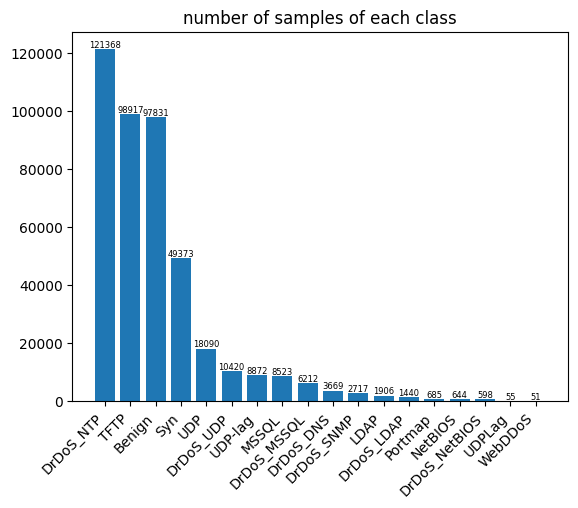

In [402]:
all_classes = ['DrDoS_NTP', 'TFTP', 'Benign', 'Syn', 'UDP', 'DrDoS_UDP', 'UDP-lag', 'MSSQL', 'DrDoS_MSSQL', 'DrDoS_DNS', 'DrDoS_SNMP', 'LDAP', 'DrDoS_LDAP', 'Portmap', 'NetBIOS', 'DrDoS_NetBIOS', 'UDPLag', 'WebDDoS']

fig, ax = plt.subplots()
barContainer = ax.bar(all_classes, cic_ddos2019_all.Label.value_counts().unique())
ax.set_title('number of samples of each class')
ax.set_xticks(range(len(all_classes)))
ax.set_xticklabels(all_classes, rotation=45, ha='right')
ax.bar_label(barContainer, cic_ddos2019_all.Label.value_counts().unique(), fontsize=6)
plt.show()

In [403]:
# creating a balanced portion of the dataset
maxSamples = 1000

balancedParts = []
for label, group in cic_ddos2019_all.groupby('Label'):
    if maxSamples <= len(group):
        sampled_DF = group.sample(n=maxSamples)
    else:
        sampled_DF = group
    balancedParts.append(sampled_DF)
cic_ddos2019_all_balanced = pd.concat(balancedParts, ignore_index=True)

print(cic_ddos2019_all_balanced.shape)

(15033, 78)


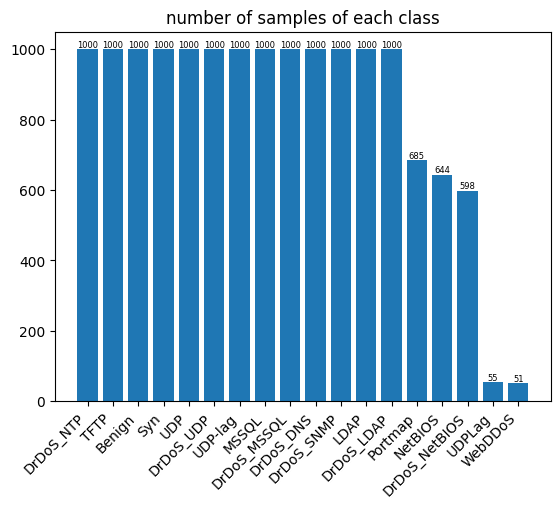

In [404]:
fig, ax = plt.subplots()
barContainer = ax.bar(all_classes, cic_ddos2019_all_balanced.Label.value_counts().values)
ax.set_title('number of samples of each class')
ax.set_xticks(range(len(all_classes)))
ax.set_xticklabels(all_classes, rotation=45, ha='right')
ax.bar_label(barContainer, cic_ddos2019_all_balanced.Label.value_counts().values, fontsize=6)
plt.show()

## using SMOTE to balance the minority classes

In [405]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
features_resampled, classes_resampled = smote.fit_resample(cic_ddos2019_all_balanced.iloc[:,:-1], cic_ddos2019_all_balanced.iloc[:,-1])

cic_ddos2019_all_balanced = pd.DataFrame(features_resampled, columns=features_resampled.columns)
cic_ddos2019_all_balanced['Label'] = classes_resampled

cic_ddos2019_all_balanced['Label'].value_counts()


Label
Benign           1000
DrDoS_DNS        1000
DrDoS_LDAP       1000
DrDoS_MSSQL      1000
DrDoS_NTP        1000
DrDoS_NetBIOS    1000
DrDoS_SNMP       1000
DrDoS_UDP        1000
LDAP             1000
MSSQL            1000
NetBIOS          1000
Portmap          1000
Syn              1000
TFTP             1000
UDP              1000
UDP-lag          1000
UDPLag           1000
WebDDoS          1000
Name: count, dtype: int64

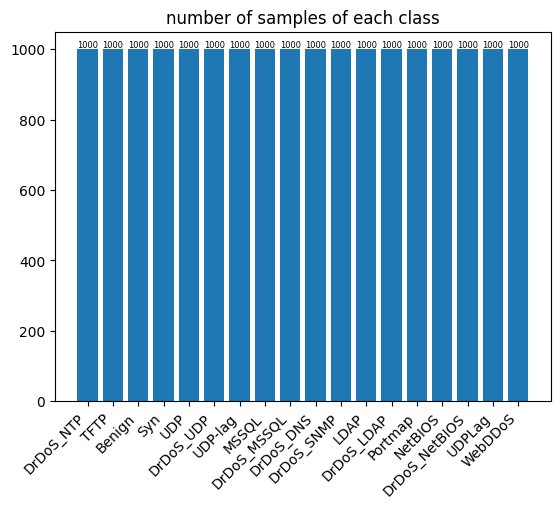

In [406]:
fig, ax = plt.subplots()
barContainer = ax.bar(all_classes, cic_ddos2019_all_balanced.Label.value_counts().values)
ax.set_title('number of samples of each class')
ax.set_xticks(range(len(all_classes)))
ax.set_xticklabels(all_classes, rotation=45, ha='right')
ax.bar_label(barContainer, cic_ddos2019_all_balanced.Label.value_counts().values, fontsize=6)
plt.show()

# TSNE Plot

In [407]:
# visualizing the balanced dataset
balanced_dataset = cic_ddos2019_all_balanced.to_numpy()
features = balanced_dataset[:,:-1]
classes = balanced_dataset[:,-1]

# features_reduces = TSNE(n_components=2).fit_transform(features)    # takes 1min30 for 15k samples


In [ ]:
print(classes)



# mapping the label names into numbers so that they can be use to assign colors for each class
labelMap = {'DrDoS_NTP':0, 'TFTP':1, 'Benign':2, 'Syn':3, 'UDP':4, 'DrDoS_UDP':5, 'UDP-lag':6, 'MSSQL':7, 'DrDoS_MSSQL':8, 'DrDoS_DNS':9, 'DrDoS_SNMP':10, 'LDAP':11, 'DrDoS_LDAP':12, 'Portmap':13, 'NetBIOS':14, 'DrDoS_NetBIOS':15, 'UDPLag':16, 'WebDDoS':17}
classes_mapped = [labelMap[label] for label in classes]

print(classes_mapped[:20])

['Benign' 'Benign' 'Benign' ... 'WebDDoS' 'WebDDoS' 'WebDDoS']
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


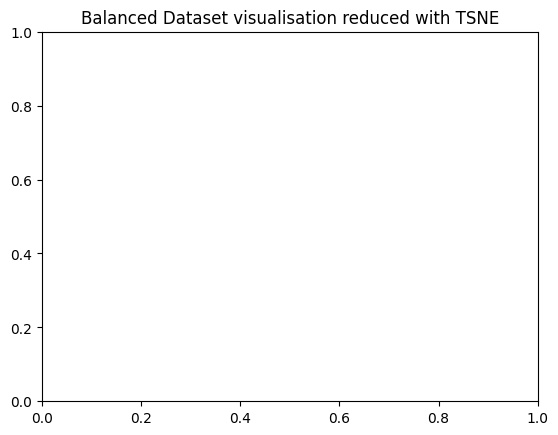

In [409]:
fig, ax = plt.subplots()
# ax.scatter(features_reduces[:,0], features_reduces[:,1], c=classes_mapped, label=classes)
ax.set_title('Balanced Dataset visualisation reduced with TSNE')
plt.show()

# Correlation Heatmap

## Correlation of all features and label

In [410]:
# removing useless constant columns from dataset
cic_ddos2019_all.drop(['Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'FIN Flag Count',
 'PSH Flag Count',
 'ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate'], axis=1, inplace=True)

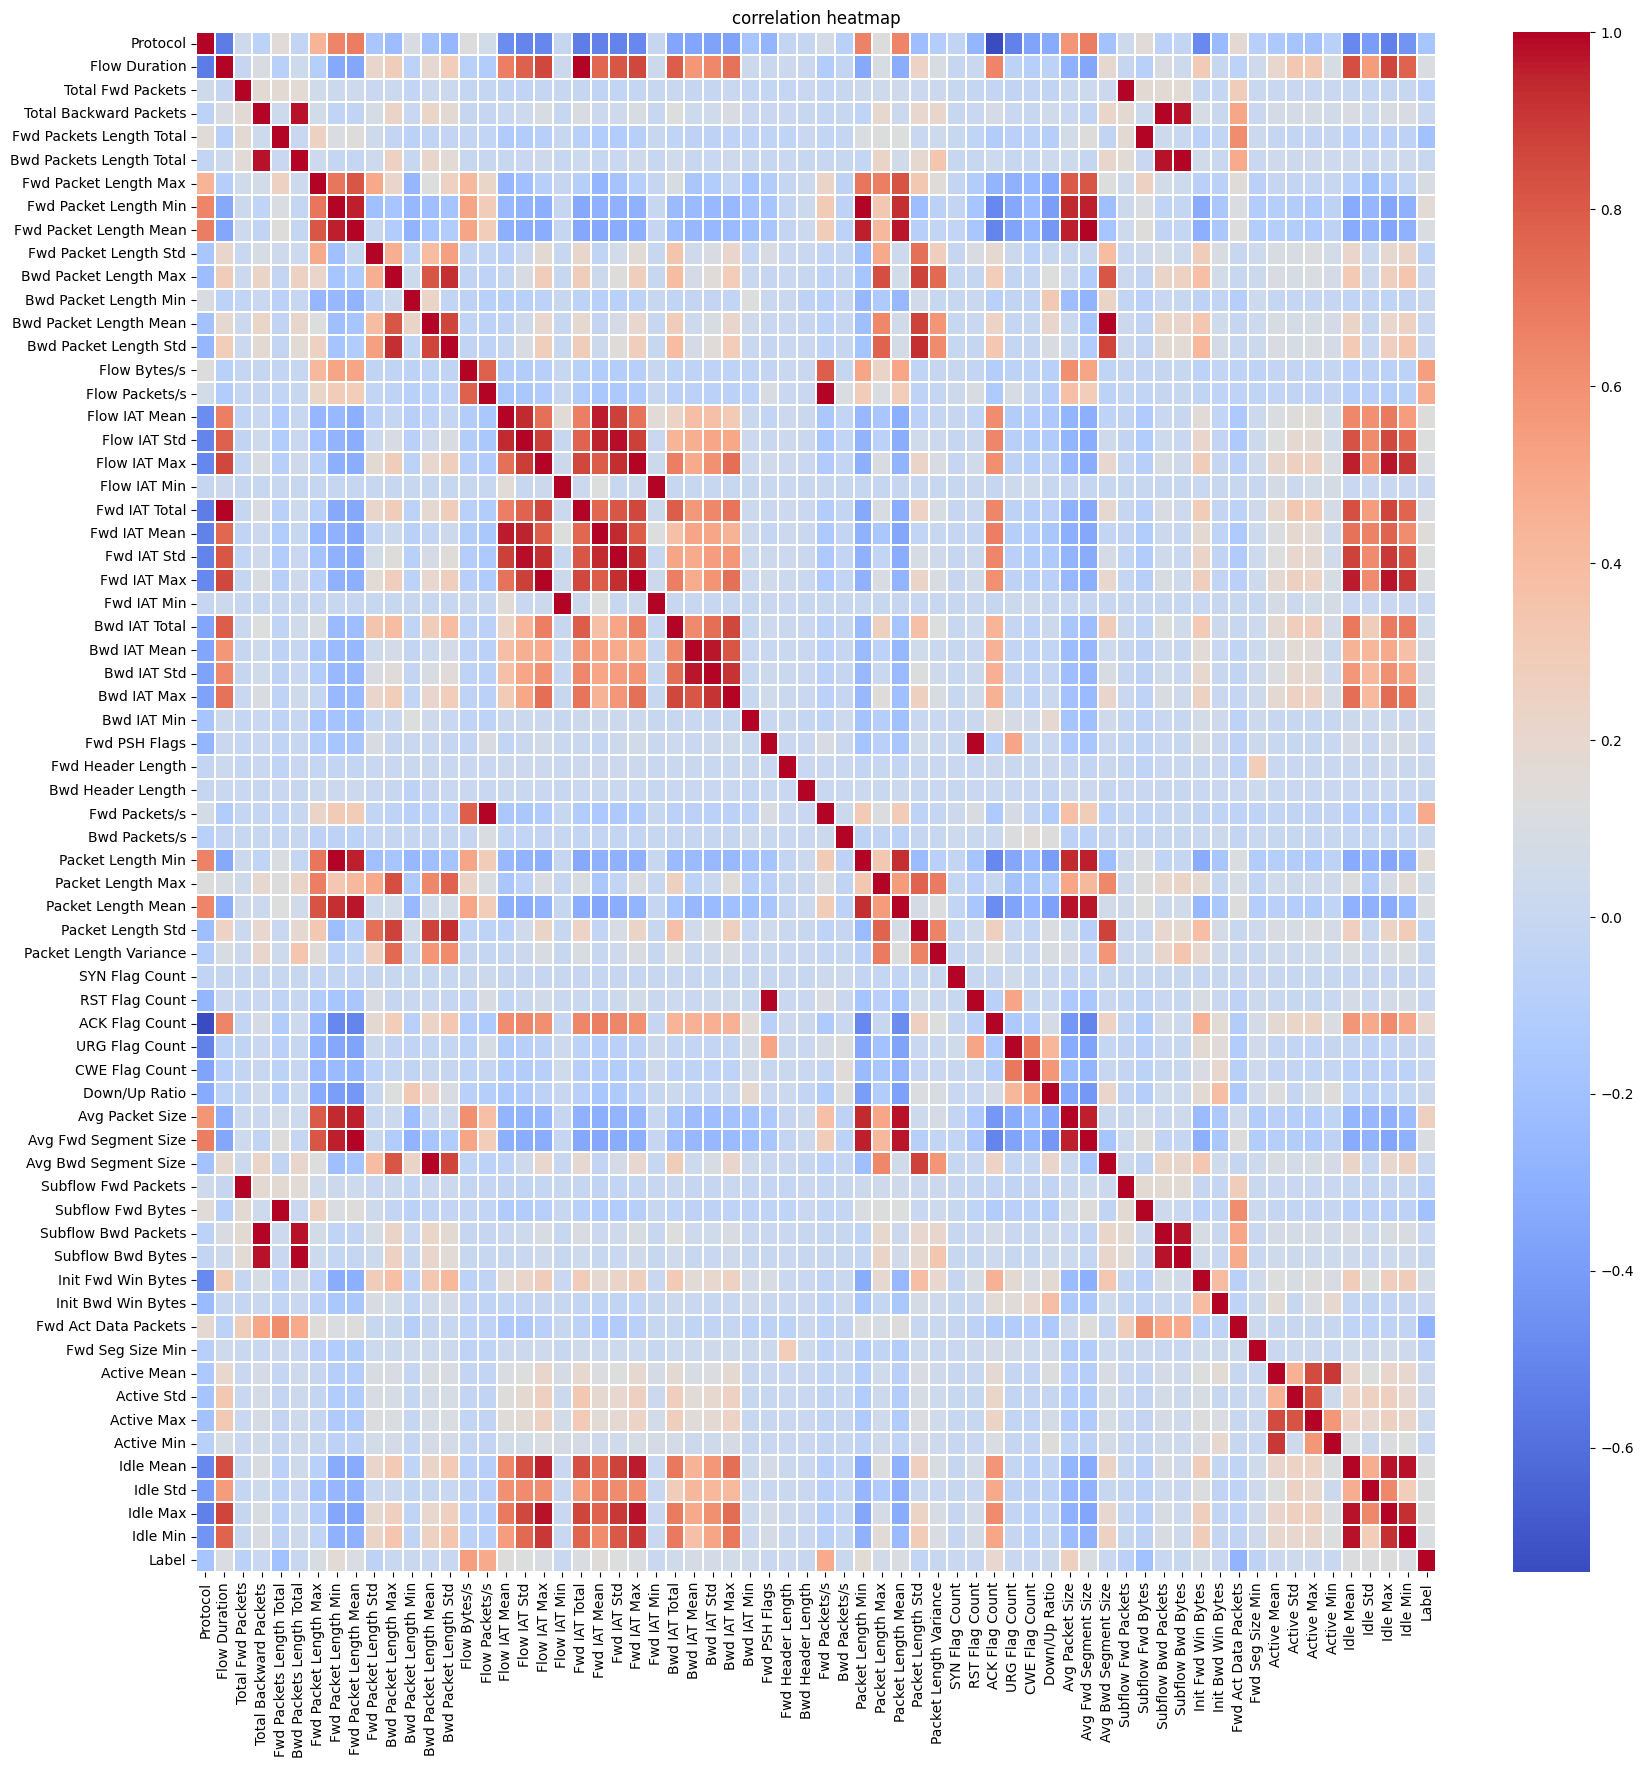

In [411]:
datasetCopy = cic_ddos2019_all.iloc[:,:]
datasetCopy['Label'] = cic_ddos2019_all['Label'].map({'DrDoS_NTP':0, 'TFTP':1, 'Benign':2, 'Syn':3, 'UDP':4, 'DrDoS_UDP':5, 'UDP-lag':6, 'MSSQL':7, 'DrDoS_MSSQL':8, 'DrDoS_DNS':9, 'DrDoS_SNMP':10, 'LDAP':11, 'DrDoS_LDAP':12, 'Portmap':13, 'NetBIOS':14, 'DrDoS_NetBIOS':15, 'UDPLag':16, 'WebDDoS':17})
correlation = datasetCopy.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cmap='coolwarm', linewidths=0.1)
plt.title('correlation heatmap')
plt.show()

## Correlation cleaned

In [412]:
# getting the column where correlation > 90
triCorrMatrix = correlation.abs().where(np.triu(np.ones(correlation.shape), k=1).astype(bool))
highCorr = [column for column in triCorrMatrix.columns if any(triCorrMatrix[column]>0.9) ]

print(len(highCorr))
print(highCorr)

# dropping the columns that contain high correlation values
newFeatures = cic_ddos2019_all.iloc[:,:].drop(columns=highCorr, axis=1)
newFeatures['Label'] = newFeatures['Label'].map({'DrDoS_NTP':0, 'TFTP':1, 'Benign':2, 'Syn':3, 'UDP':4, 'DrDoS_UDP':5, 'UDP-lag':6, 'MSSQL':7, 'DrDoS_MSSQL':8, 'DrDoS_DNS':9, 'DrDoS_SNMP':10, 'LDAP':11, 'DrDoS_LDAP':12, 'Portmap':13, 'NetBIOS':14, 'DrDoS_NetBIOS':15, 'UDPLag':16, 'WebDDoS':17})

27
['Bwd Packets Length Total', 'Fwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Std', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd Packets/s', 'Packet Length Min', 'Packet Length Mean', 'Packet Length Std', 'RST Flag Count', 'Avg Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Active Min', 'Idle Mean', 'Idle Max', 'Idle Min']


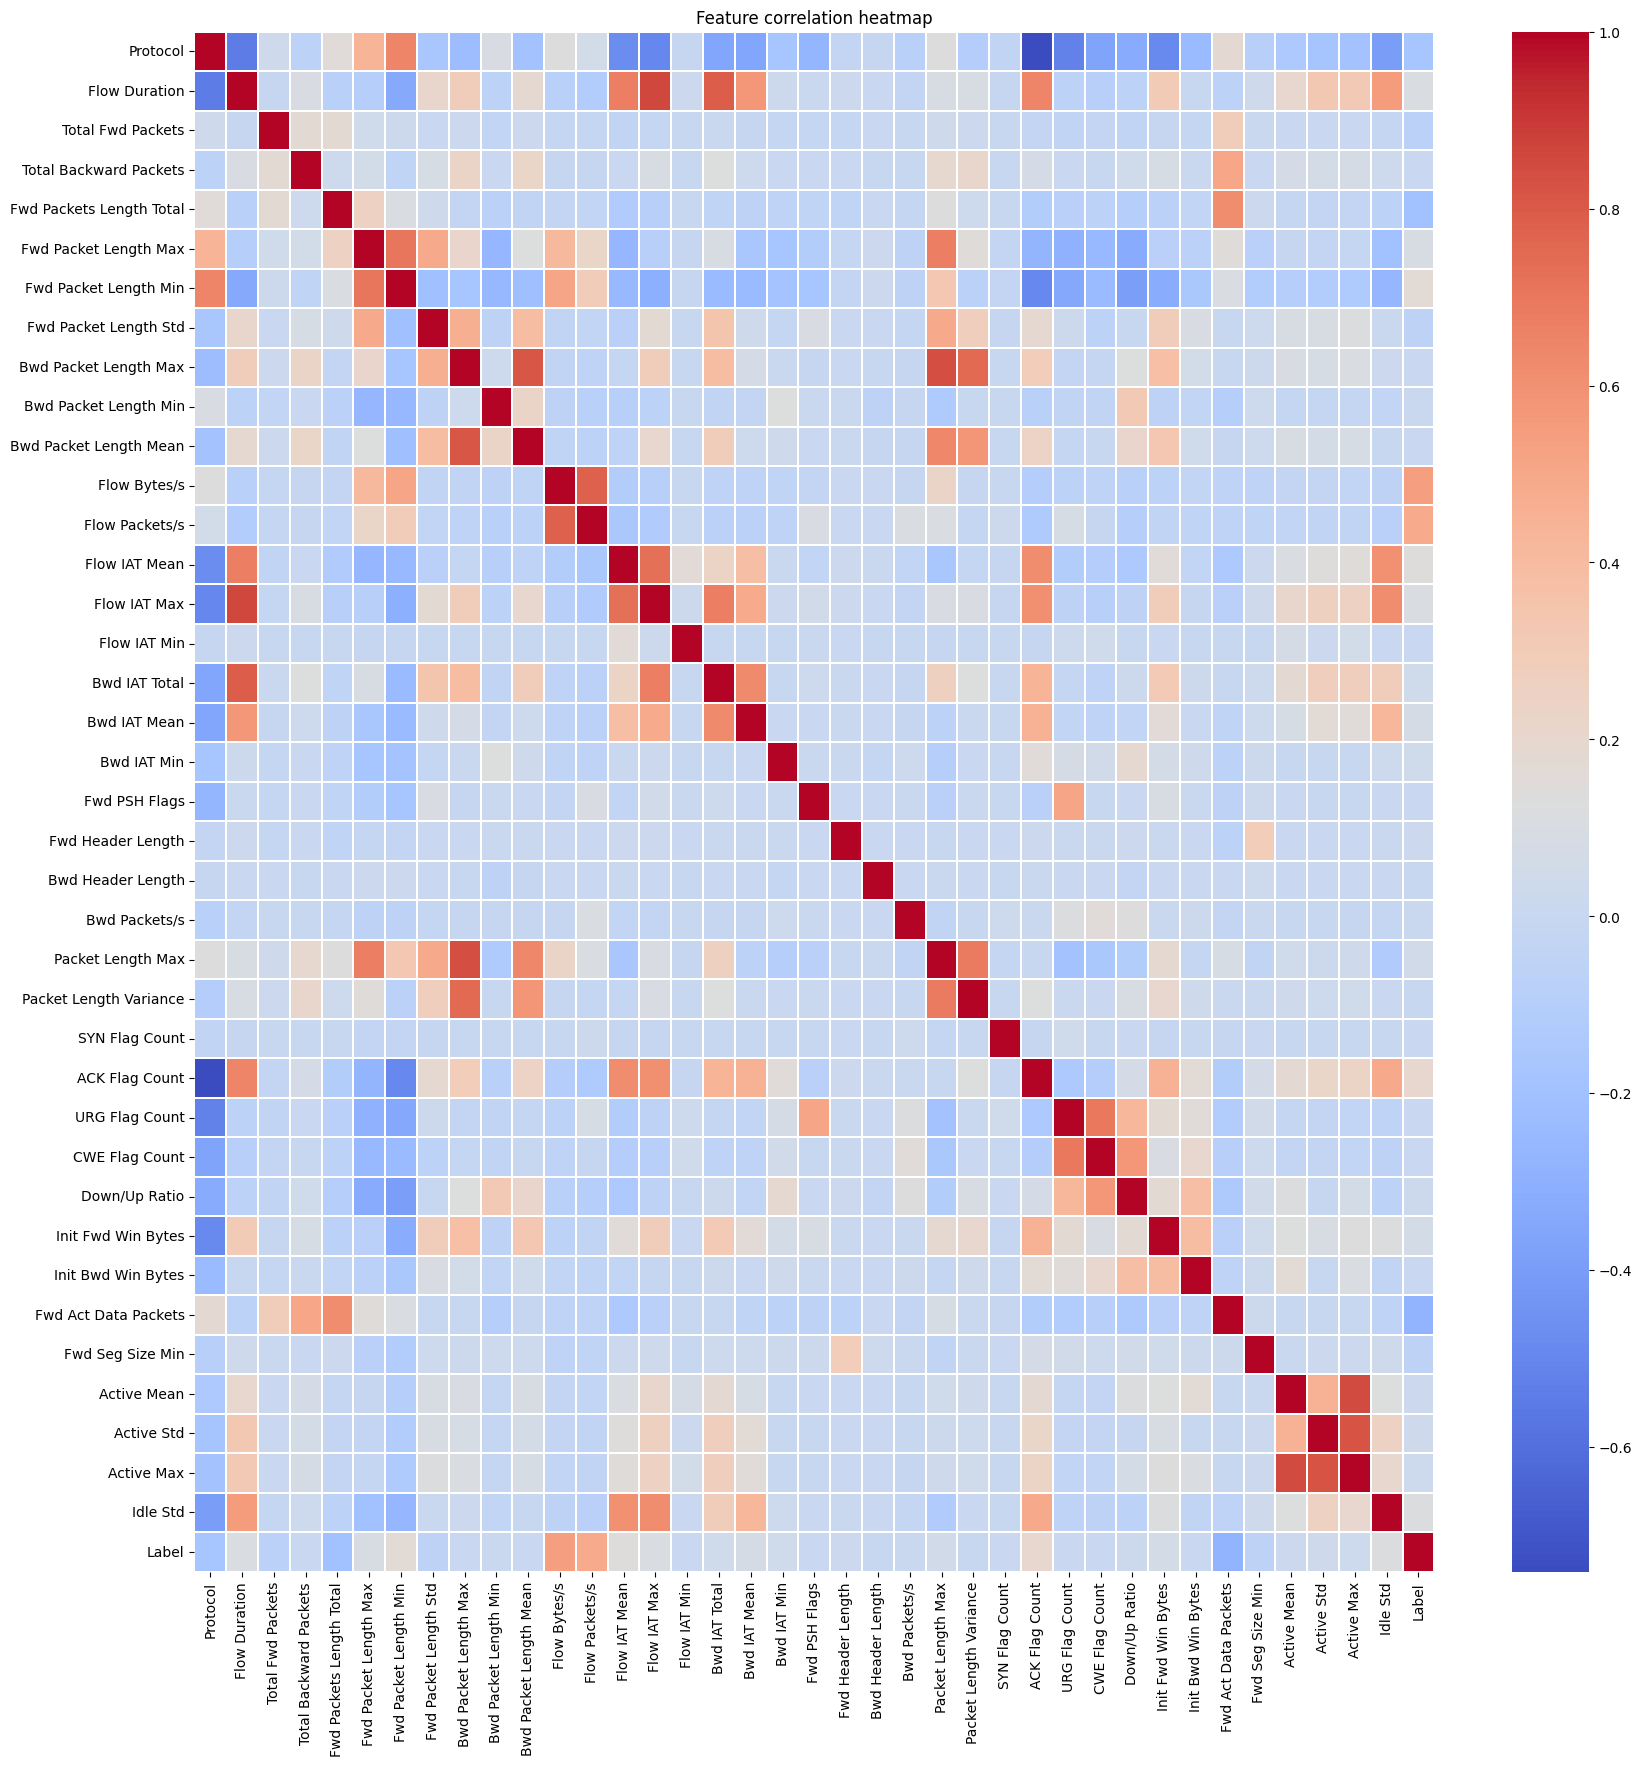

In [413]:
newCorrelation = newFeatures.corr()
plt.figure(figsize=(20,20))
sns.heatmap(newCorrelation, cmap='coolwarm', linewidths=0.1)
plt.title('Feature correlation heatmap')
plt.show()

# Outlier Detection

## Standard deviation for each feature

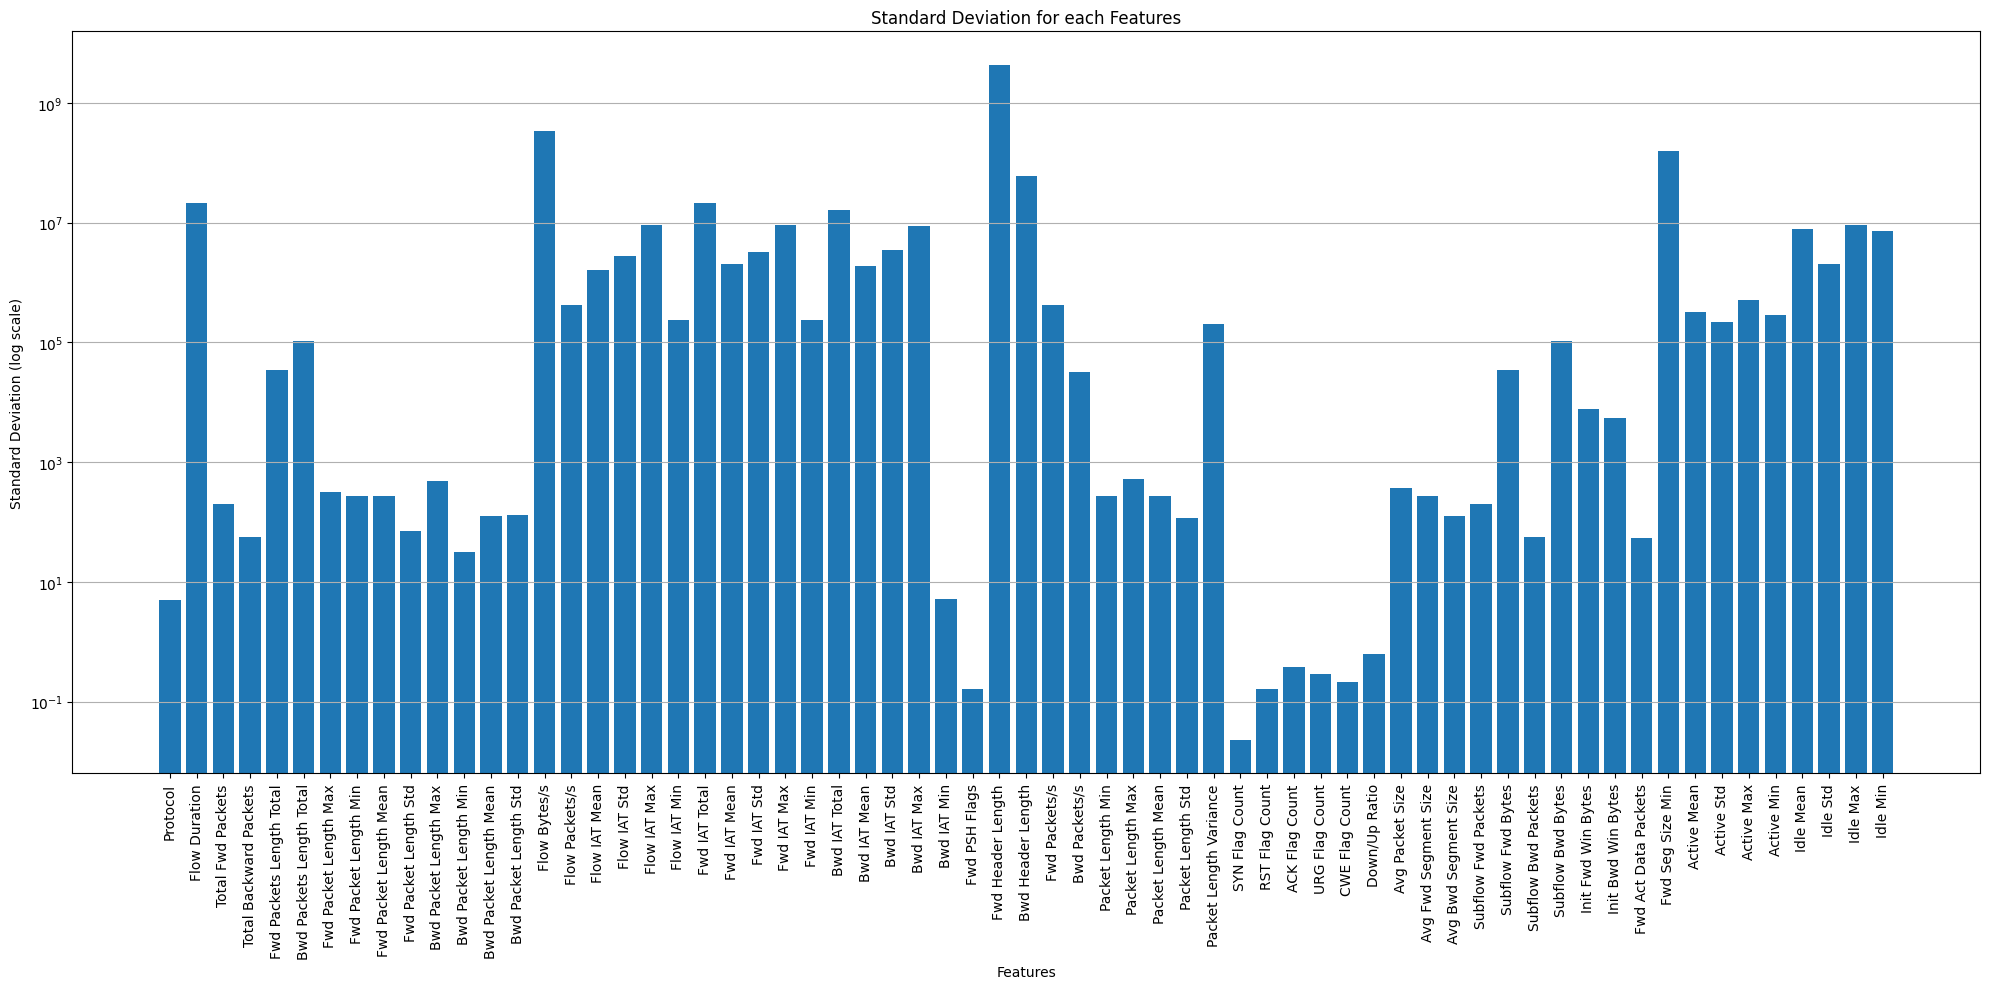

In [414]:
features = cic_ddos2019_all.iloc[:, :-1]
# features = cic_ddos2019_all_balanced.iloc[:, :-1]

features_names = np.array(features.columns)

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(features_names, features.std())
ax.set_yscale('log')
ax.grid(axis='y')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Standard Deviation (log scale)')
plt.title('Standard Deviation for each Features')
plt.tight_layout()
plt.show()

## Standard deviation for non correlated features

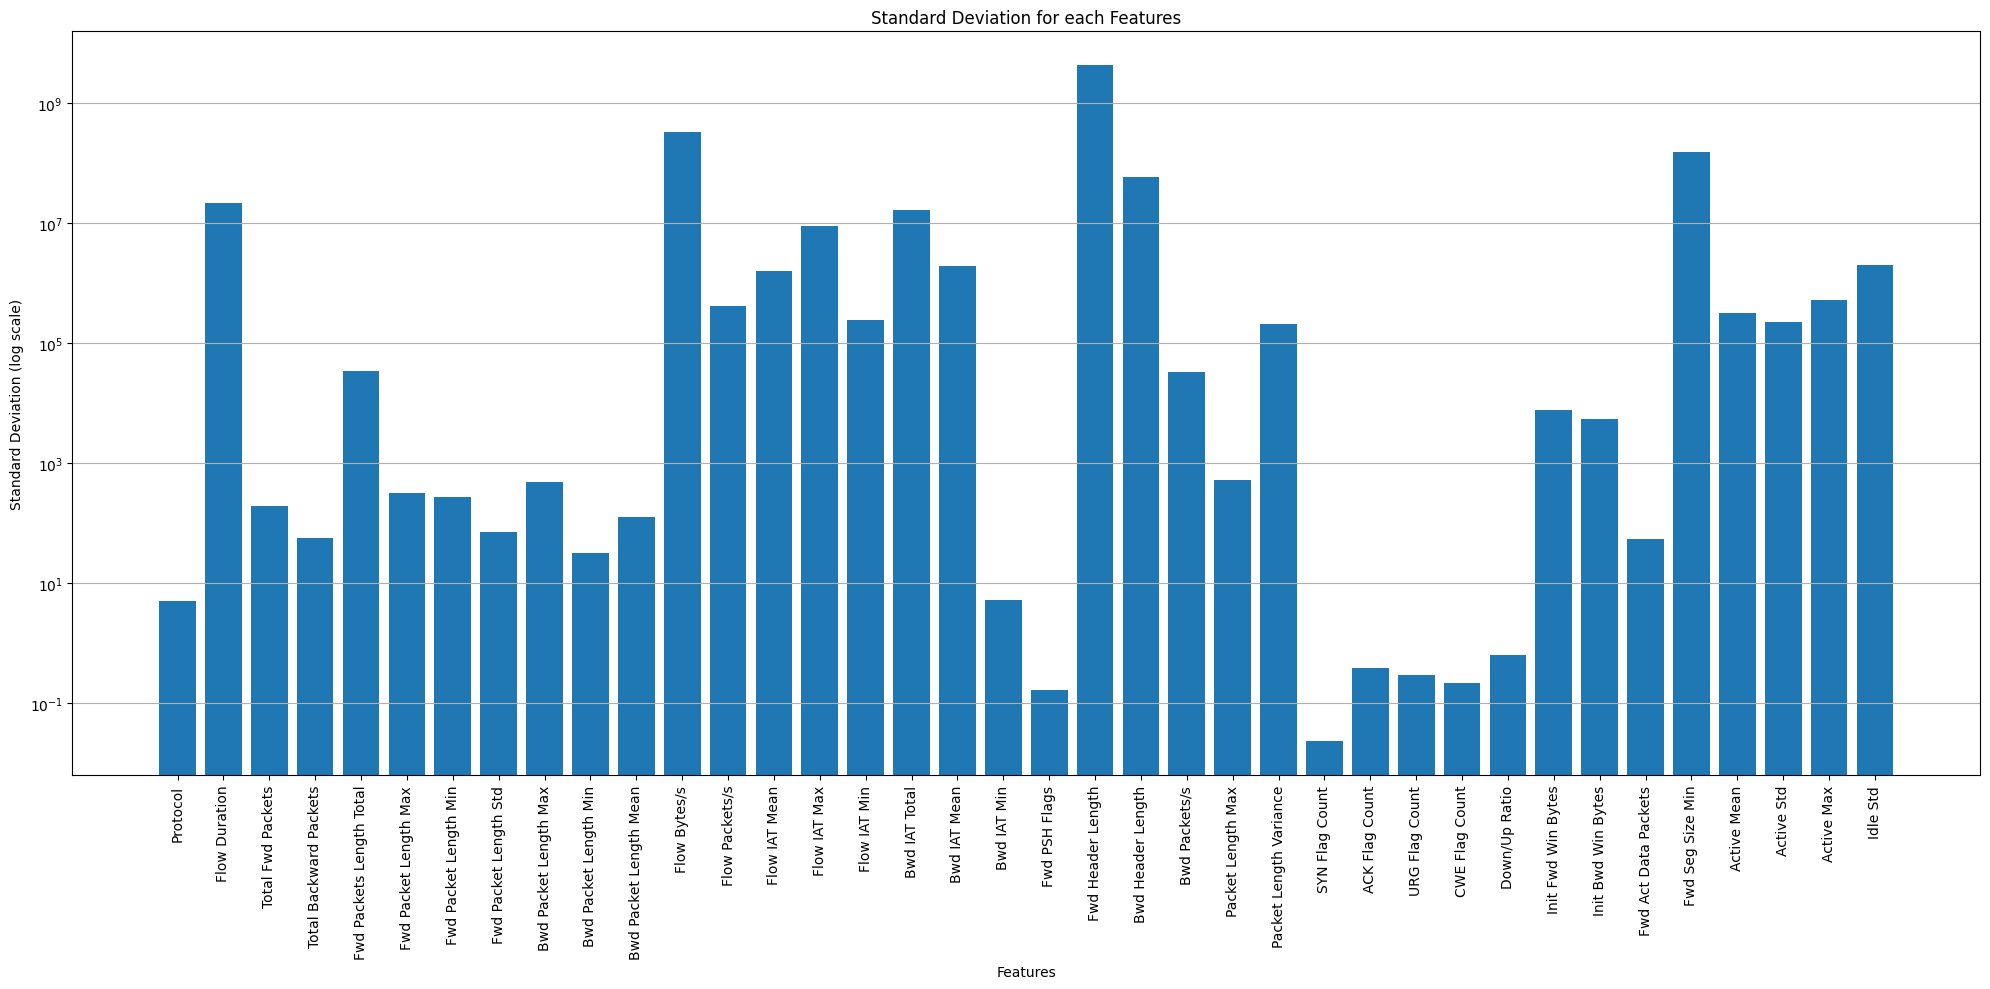

In [415]:
features = cic_ddos2019_all.iloc[:, :-1].drop(columns=highCorr, axis=1)
# features = cic_ddos2019_all_balanced.iloc[:, :-1]

features_names = np.array(features.columns)

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(features_names, features.std())
ax.set_yscale('log')
ax.grid(axis='y')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Standard Deviation (log scale)')
plt.title('Standard Deviation for each Features')
plt.tight_layout()
plt.show()

## Box Plot for each feature

In [416]:
features.var()

Protocol                    2.466823e+01
Flow Duration               4.522411e+14
Total Fwd Packets           3.837246e+04
Total Backward Packets      3.177600e+03
Fwd Packets Length Total    1.186977e+09
Fwd Packet Length Max       1.024166e+05
Fwd Packet Length Min       7.469218e+04
Fwd Packet Length Std       5.033347e+03
Bwd Packet Length Max       2.407795e+05
Bwd Packet Length Min       1.024990e+03
Bwd Packet Length Mean      1.576588e+04
Flow Bytes/s                1.104554e+17
Flow Packets/s              1.716320e+11
Flow IAT Mean               2.572699e+12
Flow IAT Max                8.073200e+13
Flow IAT Min                5.699058e+10
Bwd IAT Total               2.667336e+14
Bwd IAT Mean                3.614579e+12
Bwd IAT Min                 2.709279e+01
Fwd PSH Flags               2.641574e-02
Fwd Header Length           1.820634e+19
Bwd Header Length           3.488694e+15
Bwd Packets/s               1.047151e+09
Packet Length Max           2.807777e+05
Packet Length Va

In [417]:
# balanced_all = np.log1p(features)
balanced_all = (features-features.mean())/features.std()
# balanced_all = features
# balanced_all = (features - features.min()) / (features.max() - features.min())

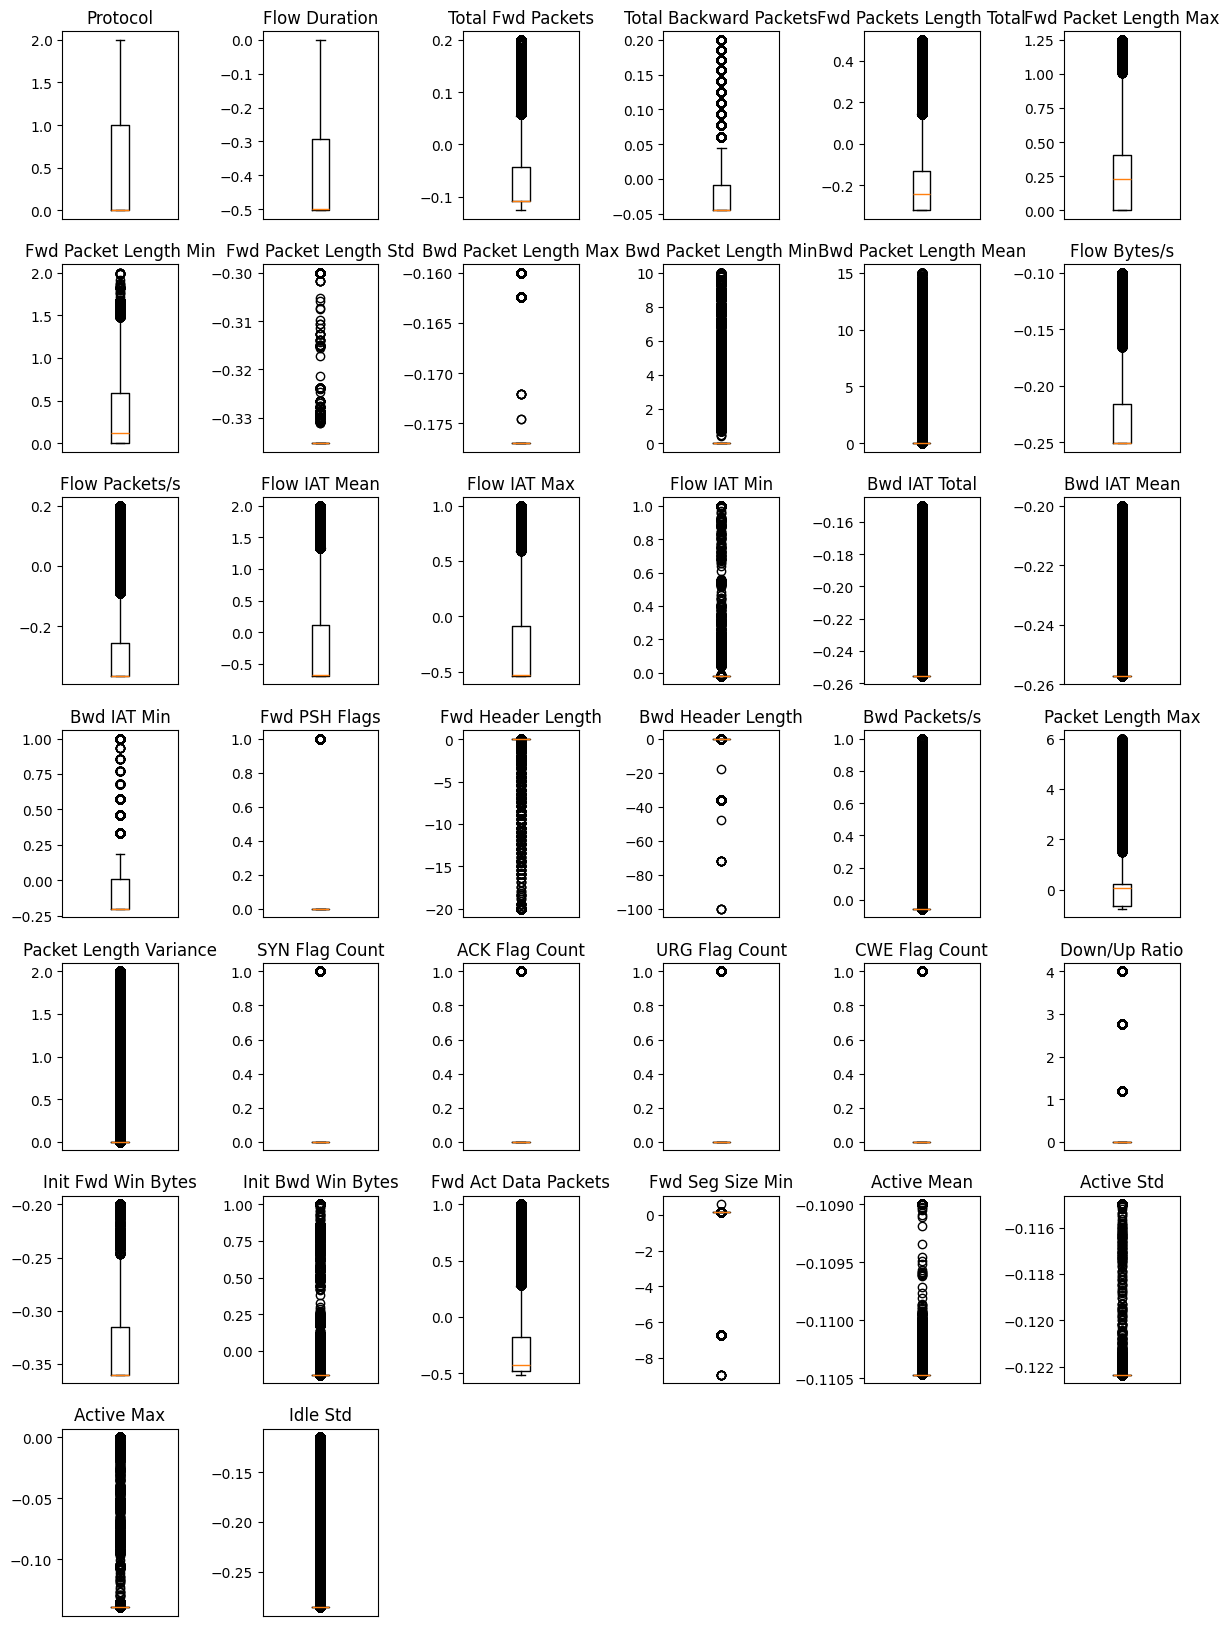

In [418]:

balanced_all['Protocol'], _ = pd.factorize(balanced_all['Protocol'])
balanced_all['Flow Duration'] = np.log1p(balanced_all['Flow Duration']).clip(upper=0)
balanced_all['Total Fwd Packets'] = np.log1p(balanced_all['Total Fwd Packets']).clip(upper=0.2)
balanced_all['Total Backward Packets'] = np.log1p(balanced_all['Total Backward Packets']).clip(upper=0.2)
balanced_all['Fwd Packets Length Total'] = np.log1p(balanced_all['Fwd Packets Length Total']).clip(upper=0.5)
balanced_all['Fwd Packet Length Max'] = np.log1p(balanced_all['Fwd Packet Length Max'].clip(lower=0)).clip(upper=1.25)

balanced_all['Fwd Packet Length Min'] = np.log1p(balanced_all['Fwd Packet Length Min'].clip(lower=0)).clip(upper=2)
balanced_all['Fwd Packet Length Std'] = np.log1p(balanced_all['Fwd Packet Length Std']).clip(upper=-0.3)
balanced_all['Bwd Packet Length Max'] = np.log1p(balanced_all['Bwd Packet Length Max']).clip(upper=-0.16)
balanced_all['Bwd Packet Length Min'] = balanced_all['Bwd Packet Length Min'].clip(lower=0, upper=10)
balanced_all['Bwd Packet Length Mean'] = balanced_all['Bwd Packet Length Mean'].clip(lower=0, upper=15)
balanced_all['Flow Bytes/s'] = np.log1p(balanced_all['Flow Bytes/s']).clip(upper=-0.1)

balanced_all['Flow Packets/s'] = np.log1p(balanced_all['Flow Packets/s']).clip(upper=0.2)
balanced_all['Flow IAT Mean'] = np.log1p(balanced_all['Flow IAT Mean']).clip(upper=2)
balanced_all['Flow IAT Max'] = np.log1p(balanced_all['Flow IAT Max']).clip(upper=1)
balanced_all['Flow IAT Min'] = np.log1p(balanced_all['Flow IAT Min']).clip(upper=1)
balanced_all['Bwd IAT Total'] = np.log1p(balanced_all['Bwd IAT Total']).clip(upper=-0.15)
balanced_all['Bwd IAT Mean'] = np.log1p(balanced_all['Bwd IAT Mean']).clip(upper=-0.2)

balanced_all['Bwd IAT Min'] = np.log1p(balanced_all['Bwd IAT Min']).clip(upper=1)
balanced_all['Fwd PSH Flags'], _ = pd.factorize(balanced_all['Fwd PSH Flags'])
balanced_all['Fwd Header Length'] = balanced_all['Fwd Header Length'].clip(lower=-20)
balanced_all['Bwd Header Length'] = balanced_all['Bwd Header Length'].clip(lower=-100)
balanced_all['Bwd Packets/s'] = np.log1p(balanced_all['Bwd Packets/s']).clip(upper=1)
balanced_all['Packet Length Max'] = balanced_all['Packet Length Max'].clip(upper=6)

balanced_all['Packet Length Variance'] = np.log1p(balanced_all['Packet Length Variance']).clip(lower=0, upper=2)
balanced_all['SYN Flag Count'], _ = pd.factorize(np.log1p(balanced_all['SYN Flag Count']))
balanced_all['ACK Flag Count'], _ = pd.factorize(balanced_all['ACK Flag Count'])
balanced_all['URG Flag Count'], _ = pd.factorize(np.log1p(balanced_all['URG Flag Count']))
balanced_all['CWE Flag Count'], _ = pd.factorize(np.log1p(balanced_all['CWE Flag Count']))
balanced_all['Down/Up Ratio'] = balanced_all['Down/Up Ratio'].clip(lower=0, upper=4)

balanced_all['Init Fwd Win Bytes'] = np.log1p(balanced_all['Init Fwd Win Bytes']).clip(upper=-0.2)
balanced_all['Init Bwd Win Bytes'] = np.log1p(balanced_all['Init Bwd Win Bytes']).clip(upper=1)
balanced_all['Fwd Act Data Packets'] = np.log1p(balanced_all['Fwd Act Data Packets']).clip(upper=1)
balanced_all['Fwd Seg Size Min'] = balanced_all['Fwd Seg Size Min']
balanced_all['Active Mean'] = np.log1p(balanced_all['Active Mean']).clip(upper=-0.109)
balanced_all['Active Std'] = np.log1p(balanced_all['Active Std']).clip(upper=-0.115)

balanced_all['Active Max'] = np.log1p(balanced_all['Active Max']).clip(upper=0)
balanced_all['Idle Std'] = np.log1p(balanced_all['Idle Std']).clip(upper=-0.115)

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# balanced_all_vzzt = scaler.fit_transform(balanced_all.to_numpy())
# balanced_all_df = pd.DataFrame(balanced_all_vzzt, columns=features.columns)

plt.figure(figsize=(12,35))
for i in range(len(balanced_all.columns)):
    plt.subplot(15, 6, i+1)
    plt.title(balanced_all.columns[i])
    plt.boxplot(balanced_all[balanced_all.columns[i]], showfliers=True)
    plt.xticks([])
plt.tight_layout()
plt.show()


-0.7684392792597703
6.0

-0.6589814931067092
0.06193013293586573
0.2053575768605665
2421


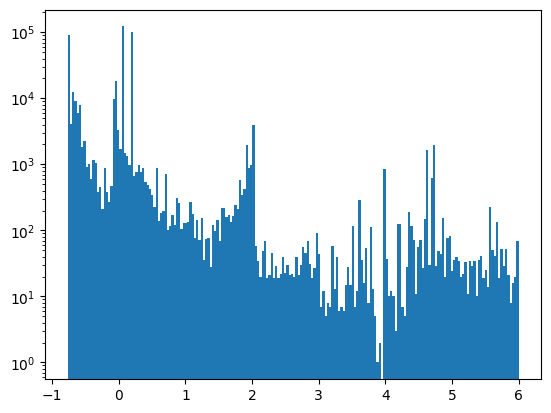

In [419]:
columnToCheck = balanced_all['Packet Length Max']
print(columnToCheck.min())
print(columnToCheck.max())
print('')

print(columnToCheck.quantile(0.25))
print(columnToCheck.quantile(0.5))
print(columnToCheck.quantile(0.75))

print(len(columnToCheck.unique()))

fig, ax = plt.subplots()
counts, bins, patches = plt.hist(columnToCheck, 200)
plt.yscale('log')
plt.show()



In [420]:
balanced_all_df.isna().any().any()

np.False_

In [421]:
balanced_all_df['Packet Length Max'].isna().sum()

np.int64(0)

In [422]:
# column_names = balanced_all.columns.tolist()

# for column in column_names:
#     Q1 = balanced_all[column].quantile(0.25)
#     Q2 = balanced_all[column].quantile(0.5)
#     Q3 = balanced_all[column].quantile(0.75)
#     IQR = Q3 - Q1

#     upper_bound = Q3 + 1.5 * IQR
#     lower_bound = Q1 - 1.5 * IQR

#     upper_outliers = balanced_all[balanced_all[column] > upper_bound].shape[0]
#     lower_outliers = balanced_all[balanced_all[column] < lower_bound].shape[0]

#     print('{} =   {} (upper)       +       {} (lower)    -----    {}'.format(upper_outliers + lower_outliers, upper_outliers, lower_outliers, column))

In [423]:
# print(len(balanced_all.columns))

# plt.figure(figsize=(15,35))
# for i in range(len(balanced_all.columns)):
#     plt.subplot(15, 6, i+1)
#     plt.title(balanced_all.columns[i])
#     counts, bins, patches = plt.hist(balanced_all[balanced_all.columns[i]], 100)
#     plt.yscale('log')
#     plt.xticks([])
# plt.tight_layout()
# plt.show()
